In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV


e:\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
e:\python35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [3]:
from sklearn import metrics

In [4]:
ds = pd.read_csv('../../data/ml4/train_data.csv')

In [9]:
ds.shape

(169307, 39)

In [5]:
ds = ds.drop(['cat_8','cat_16','cat_14','cat_13'],axis=1)
# ds = ds.drop(['cat_19','cat_5','cat_10','cont_5'],axis=1)

In [17]:
ds_test = ds_test.drop(['cat_8','cat_16','cat_14','cat_13'],axis=1)
# ds = ds.drop(['cat_19','cat_5','cat_10','cont_5'],axis=1)

In [15]:
ds_test = pd.read_csv('../../data/ml4/test_data.csv')

In [5]:
predictors = [x for x in ds.columns if x not in ['connection_id','target']]

In [6]:
def modelfitxg(alg,dtrain,predictors,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):
    
    if useTrainCV:
        
        xgb_params = alg.get_xgb_params()
        xgb_params['num_class'] = 3
        print(xgb_params)
        xgtrain = xgb.DMatrix(dtrain[predictors].values,label=dtrain['target'].values)
        print('prepared Dmatrix')
        cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round = alg.get_params()['n_estimators'],
                         nfold=cv_folds,early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    # fit the algorithm
        print(cvresult)
    
    print('Fitting Model')
    alg.fit(dtrain[predictors],dtrain['target'],eval_metric='auc')
    print('Model Fitted')
    #predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    print ("Accuracy: %.4f"%metrics.accuracy_score(dtrain['target'].values,dtrain_predictions))
#     print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[''], dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar',title='Feature Importance')
    plt.ylabel('Feature Importance Score')
    
    return cvresult

In [7]:
xgb1 = XGBClassifier(learning_rate=0.1,
              n_estimators=500,
              max_depth=5,
              min_child_weight=4,
              gamma=2,
              subsample=0.85,
              colsample_bytree=0.85,
              objective='multi:softmax',
              nthread=4,
              reg_alpha = 0.05,
              scale_pos_weight=1,
              seed=27)

In [9]:
cv_result11 = modelfitxg(xgb1,ds,predictors)

{'nthread': 4, 'scale_pos_weight': 1, 'n_estimators': 200, 'subsample': 0.85, 'learning_rate': 0.1, 'reg_lambda': 1, 'min_child_weight': 4, 'max_delta_step': 0, 'objective': 'multi:softmax', 'reg_alpha': 0.5, 'colsample_bylevel': 1, 'num_class': 3, 'base_score': 0.5, 'gamma': 2, 'colsample_bytree': 0.85, 'missing': None, 'max_depth': 5, 'seed': 27, 'silent': 1}
prepared Dmatrix
     test-merror-mean  test-merror-std  train-merror-mean  train-merror-std
0            0.221978         0.000915           0.221860          0.000214
1            0.222067         0.000936           0.221960          0.000282
2            0.222031         0.001059           0.221968          0.000196
3            0.222084         0.000994           0.222012          0.000225
4            0.221955         0.001012           0.221879          0.000166
5            0.222096         0.001063           0.222036          0.000119
6            0.222002         0.001016           0.221943          0.000134
7          

In [26]:
print(cv_result11['test-merror-mean'].mean(),cv_result11['test-merror-mean'].max())
print(cv_result11['test-merror-std'].mean())
print(cv_result11['train-merror-mean'].mean())
print(cv_result11['train-merror-std'].mean())

0.219460451389 0.2223088
0.000901664107168
0.219211522222
0.000219334851019


In [10]:
print(cv_result11['test-merror-mean'].mean(),cv_result11['test-merror-mean'].max(),cv_result11['test-merror-mean'].min())
print(cv_result11['test-merror-std'].mean())
print(cv_result11['train-merror-mean'].mean())
print(cv_result11['train-merror-std'].mean())

0.219633716832 0.2220964 0.2190782
0.000890674309512
0.219443233663
0.000224814380943


In [12]:
feat_imp = pd.Series(xgb1.booster().get_fscore()).sort_values(ascending=False)

In [13]:
feat_imp

cont_2     466
cat_2      398
cat_20     398
cont_3     304
cont_11    211
cat_23     190
cat_22     168
cont_17    157
cat_21     126
cont_14    113
cont_12    112
cont_1     105
cont_13    103
cat_3      100
cat_7       89
cont_8      81
cont_9      60
cont_15     53
cat_1       50
cont_16     46
cat_9       40
cat_10      27
cont_4      26
cont_5      25
cont_10     22
cont_6      22
cont_18     15
cat_8       12
cat_19      11
cat_5        7
cont_7       1
dtype: int64

In [13]:
feat_imp

cat_20     1647
cont_2      970
cat_2       912
cat_23      712
cont_3      591
cat_21      551
cont_12     475
cont_11     439
cont_8      381
cont_17     329
cont_9      325
cat_22      324
cont_13     292
cont_1      220
cont_14     206
cat_7       180
cat_3       162
cat_1       121
cont_15     117
cont_16      85
cont_6       85
cont_4       65
cont_5       60
cat_9        56
cont_10      40
cont_18      33
cat_10       28
cat_5        20
cat_19       17
cont_7       12
dtype: int64

In [14]:
test_targets = xgb1.predict(ds_test[predictors])

NameError: name 'ds_test' is not defined

In [16]:
test_connections = ds_test['connection_id']

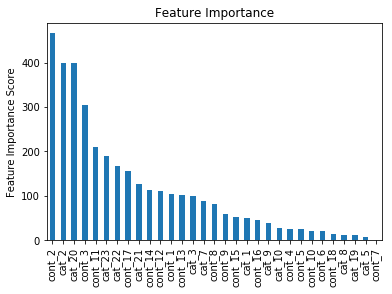

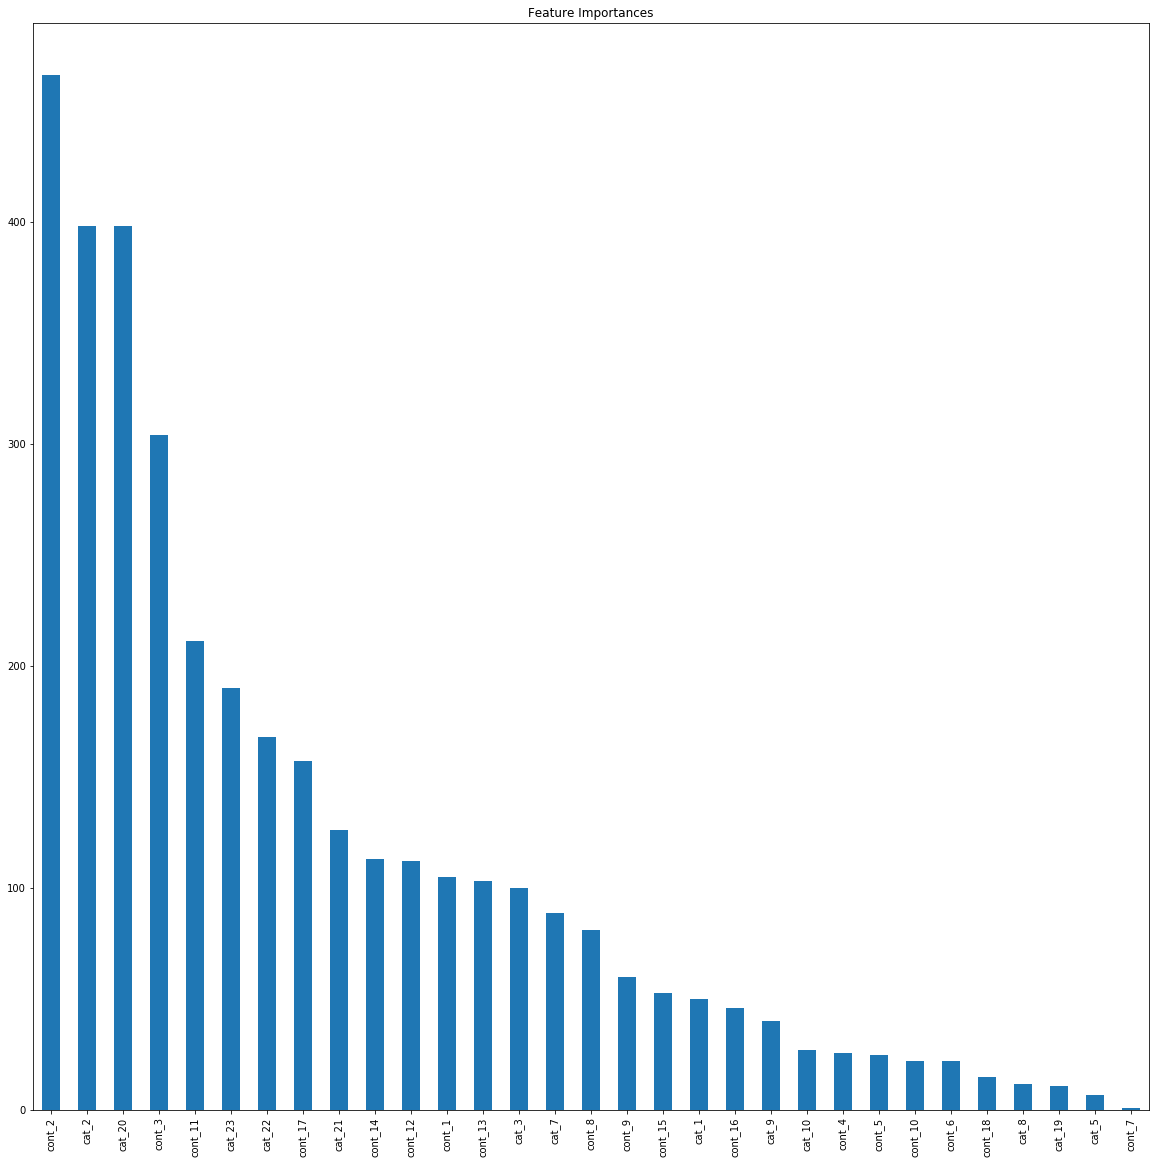

In [17]:
plt.figure(figsize=(20,20))
feat_imp.plot(kind='bar',title='Feature Importances')
plt.show()

In [20]:
test_targets

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [34]:
output = []
for i in range(len(test_connections)):
    output.append((test_connections[i],test_targets[i]))

In [35]:
np.savetxt('./ml4output12.csv',output,fmt='%s,%s',delimiter=',',header='connection_id,target')